# Piyush Kumar Gaurav
# Roll No. 20104442
# Assignment 3

## Importing Suggested Libraries

In [6]:
import pandas as pd # used to read uci dataset
import numpy as np # used to develop algorithms assigned in Questions
import matplotlib.pyplot as plt # for displaying plots 

# Q1. We saw the perceptron algorithm in Lecture 15. I want you to implement this algorithm, and use it to classify banknotes as forged or authentic in the given dataset.


## Following are some useful customized function in order to solve for Q1

In [7]:
attrbute_in_seq = ["variance_wav_img", "skewness_wav_img", "curtosis_wav_img", "entropy_wav_img","auth_class"]

def panda2nparray(df):
    ''' 
    This fn is a part of data preprocessing.
    This fn. does following:
    1. Converts pandas data frame to numpy array of data.
    2. separates X data (features) and Y data (target)
    3. stores sequence of feature as arranged in numpy array 
    
    input: df -> panda dataframe
    output: X_data -> 2D feature data np array of size "no of data points" X "no of features"
            Y_data -> 1D target np array (here, price) of length "no of data points"
            feature_list - a list (having feature name in seq. corresponding to columns of X_data)
    '''
    feature_list = df.columns
    data = df.to_numpy()
    X_data = data[:,:-1]
    Y_data = data[:,-1]
    return X_data, Y_data, feature_list
    
def random_shuffle(X_data, Y_data):
    ''' 
    This fn is a part of data preprocessing.
    This fn. does following:
    1. randomly shuffles X and Y data
    2. keeps a track of correspondence between X and Y.
    3. Feature sequence of X data remains unaltered.
    
    input: X_data -> 2D feature data np array of size "no of data points" X "no of features"
           Y_data -> 1D target np array (here, price) of length "no of data points"
    output: X_data_shuffle -> randomly shuffled 2D feature data np array of size "no of data points" X "no of features"
            Y_data_shuffle -> 1D target array (here, price) of length "no of data points" corresponding to "X_data_shuffle"
    '''
    no_data_points = X_data.shape[0]
    no_feature = X_data.shape[1]
    seq = []
    
    for l in range(no_data_points):
        seq.append(l)
        np.random.shuffle(seq)
        
    X_data_shuffle = []
    Y_data_shuffle = []
    for m in range(no_data_points):
        X_data_shuffle.append(X_data[seq[m],:])
        Y_data_shuffle.append(Y_data[seq[m]])
    X_data_shuffle = np.array(X_data_shuffle)
    Y_data_shuffle = np.array(Y_data_shuffle)
    return X_data_shuffle, Y_data_shuffle

def label_change(Y_data):
    ''' 
    This fn is a part of data preprocessing.
    This fn. does following:
    1. Convert label "0" to "-1"
    2. Ensures labels are integer values
    
    input: Y_data -> 1D target np array (here, authentication class) of length "no of data points"
    output: Y_data_upd -> updated 1D target array (here, authentication class) of length "no of data points" with "1" and "-1" class
    '''
    no_data_points = len(Y_data)
    Y_data_upd = Y_data
    for i in range(no_data_points):
        if Y_data[i] == 0:
            Y_data_upd[i] = -1
    Y_data_upd = Y_data_upd.astype(int)
    return Y_data_upd

def prepare_banknotedataset(data_path, attrbute_in_seq):
    ''' 
    This function does pre processing by utilising functions described above
    This fn. does following:
    1. Read data csv file
    2. Converting from panda df to nparray, 
    3. Random Data shuffling.
    4. Changing label from 0 to -1
    
    input: data_path -> data file with address
           attrbute_in_seq -> a list of feature / attribute of bank note dataset (in sequence)
    output: X_data_shuffle -> 2D feature data np array of size "no of data points" X "no of features"
            Y_data_shuffle -> 1D target np array (here, authentication class) of length "no of data points"
    '''
    df = pd.read_csv(data_path, names = attrbute_in_seq)
    X_data, Y_data, feature_list = panda2nparray(df)
    X_data_shuffle, Y_data_shuffle_pend = random_shuffle(X_data, Y_data)
    Y_data_shuffle = label_change(Y_data_shuffle_pend)
    return X_data_shuffle, Y_data_shuffle, feature_list

def perceptron_algo(X_data_shuffle, Y_data_shuffle, w_init, learn_rate=0.1, n_epoch=50, tol=1e-06):
    ''' 
    This function implements perceptron learning algorithm using just numpy, as described in described on slide 7 of Lecture 15
    
    input: X_data_shuffle -> 2D feature data np array of size "no of data points" X "no of features"
           Y_data_shuffle -> 1D target np array (here, authentication class) of length "no of data points"
           w_init -> 1D initial weight np array of length "no of dimension"(= X_data_shuffle.shape[1] = 4)
           learn_rate -> float scalar value, learning rate for the perceptron algo.
           n_epoch -> int scalar value, maximum number of epoch possible (default value = 50)
           tol -> float scalar value, tolerance for weight convergence
    output: w -> 1D  learned weight np array of length "no of dimension"(= X_data_shuffle.shape[1] = 4)
    '''
    no_data_points = len(Y_data_shuffle)
    no_dim = len(w_init)
    no_iter = 0
    w = w_init
    for j in range(n_epoch):
        converge_criteria = np.zeros(no_dim)
        for i in range(no_data_points):
            ywx = (Y_data_shuffle[i] * np.dot(w, X_data_shuffle[i]))
            if ywx < 0:
                delta = learn_rate * (Y_data_shuffle[i] * X_data_shuffle[i])
                w += delta
                converge_criteria += delta
                no_iter += 1
        if np.all(np.abs(converge_criteria) <= tol):
            break  
    return w

# Q1(a) Code up the perceptron algorithm described on slide 7 of Lecture 15 using the same notation as in the slides. 

In [8]:
# Reading banknote data and preprocess it
data_path = "./data_banknote_authentication.txt"
X_data_shuffle, Y_data_shuffle, feature_list = prepare_banknotedataset(data_path, attrbute_in_seq)

# Initializing weights
w_init = np.random.rand(X_data_shuffle.shape[1])

# Perceptron Algorithm to learn weight
learned_wt = perceptron_algo(X_data_shuffle, Y_data_shuffle, w_init, learn_rate=0.1, n_epoch=50, tol=1e-06)

print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")
print('The perceptron algorithm described on slide 7 of Lecture 15 is coded in the function "perceptron_algo" ')
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")

print("The learned weights through perceptron algorithm are ", learned_wt)
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")


--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*

The perceptron algorithm described on slide 7 of Lecture 15 is coded in the function "perceptron_algo" 
--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*

The learned weights through perceptron algorithm are  [-4.41559047 -3.17166009 -3.24752039 -1.46461968]
--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*



# Q1(b) Write functions to make predictions using the algorithm for the banknotes dataset. Preprocess the dataset to handle missing and anomalous data.

In [9]:
def traintest_split(X_data, Y_data, test_size):
    ''' 
    This fn splits dataset into training and testing data.
    This fn. does following:
    1. splits dataset into training and testing data.
    2. based on fraction ("test_size")
    
    input: X_data -> 2D feature data np array of size "no of data points" X "no of features"
           Y_data -> 1D target np array (here, price) of length "no of data points"
           test_size -> float, fraction of data to be splitted as test, rest is training
    output: X_train -> 2D feature data np array of size "(1-test_size) * no of data points" X "no of features"
            X_test -> 2D feature data np array of size "(test_size) * no of data points" X "no of features"
            Y_train -> 1D target np array (here, price) of length "(1-test_size) * no of data points"
            Y_test -> 1D target np array (here, price) of length "(test_size) * no of data points"
    '''
    no_data_points = X_data.shape[0]
    no_feature = X_data.shape[1]
    no_data_points_test = int(np.floor(no_data_points * test_size))
    no_data_points_train = no_data_points - no_data_points_test
    
    X_train = X_data[0:no_data_points_train,:]
    X_test = X_data[no_data_points_train:,:]
    Y_train = Y_data[0:no_data_points_train]
    Y_test = Y_data[no_data_points_train:]
    
    return X_train, X_test, Y_train, Y_test

def predict_single_dp(x_data, learned_wt):
    ''' 
    This function predicts the class value of a single datapoint "x_data" using the learned weight("learned_wt")
    
    input: x_data -> 1D  single data point np array of length "no of dimension"(= X_data_shuffle.shape[1] = 4)
           learned_wt -> 1D learned weight np array of length "no of dimension"(= X_data_shuffle.shape[1] = 4)
    output: data_class -> int data class label either "-1" or "1"
            comment -> string, statement whether the data belongs to class 1(Authentic Note) or class 0(Forged Note)
    '''
    y = np.dot(x_data, learned_wt)
    data_class = np.sign(y)
    if data_class >= 0:
        comment = "The data belongs to class 1 => Authentic Note"
    else:
        comment = "The data belongs to class -1 => Forged Note"
    return data_class, comment

def predict_dataset(X_data, learned_wt):
    '''
    This function predicts the class value of a multiple datapoints "X_data" using the learned weight("learned_wt")
    
    input: X_data -> 2D feature data np array of size "no of data points" X "no of features"
           learned_wt -> 1D learned weight np array of length "no of dimension"(= X_data_shuffle.shape[1] = 4)
    output: data_classes -> 1D array int data where each element is class label either "-1" or "1"
                            size of "data_classes" array is no of data points (= X_data.shape[0])
    '''
    no_dim = len(learned_wt)
    learned_wt = np.reshape(learned_wt, (no_dim, 1))
    Y = np.dot(X_data, learned_wt)
    data_classes = np.sign(Y).flatten().astype(int)
    return data_classes

# Reading banknote data and preprocess it
data_path = "./data_banknote_authentication.txt"
X_data_shuffle, Y_data_shuffle, feature_list = prepare_banknotedataset(data_path, attrbute_in_seq)

# Splitting data in traing and testing set
test_size = 0.1
X_train, X_test, Y_train, Y_test = traintest_split(X_data_shuffle, Y_data_shuffle, test_size)

# Initializing weights
w_init = np.random.rand(X_data_shuffle.shape[1])

# Perceptron Algorithm to learn weight
learned_wt = perceptron_algo(X_train, Y_train, w_init, learn_rate=0.1, n_epoch=50, tol=1e-06)

print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")
# Sample prediction - For 1 data point
x_one_dp = X_test[0,:]
y_one_dp = Y_test[0]
data_class, comment = predict_single_dp(x_one_dp, learned_wt)
print("For single data point, following is the prediction: \n")
print(comment)
print("(and the actual class is ", y_one_dp, ")\n")

print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")
# Sample prediction - For multiple data points (a dataset)
data_classes = predict_dataset(X_test, learned_wt)
print("For multiple data points, following is the prediction: \n")
print("Prediction: \t", data_classes)
print("Actual: \t", Y_test, "\n")
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")
print("The given banknote data has 'NO MISSING VALUES'. The preprocessing step peforms following: \n")
print(" 1. Read data csv file \n 2. Converting from panda df to nparray \n 3. Random Data shuffling. \n 4. Changing label from 0 to -1\n 5. Splitting data in Training and Testing")

--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*

For single data point, following is the prediction: 

The data belongs to class -1 => Forged Note
(and the actual class is  -1 )

--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*

For multiple data points, following is the prediction: 

Prediction: 	 [-1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1
  1  1  1 -1 -1  1  1  1 -1  1  1  1  1 -1  1 -1 -1 -1 -1 -1  1  1  1 -1
  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1 -1 -1  1  1 -1  1 -1  1
  1  1  1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1  1  1 -1
 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1  1 -1 -1 -1
 -1 -1 -1  1  1 -1  1 -1  1 -1 -1  1 -1  1  1 -1 -1]
Actual: 	 [-1 -1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1
  1  1  1 -1 -1  1  1  1 -1  1  1  1  1 -1  1 -1 -1 -1 -1 -1  1  1  1 -1
  1  

# Q1(c) Train the algorithm on the dataset using cross-validation and report cross-validated test set error

# and

# Q1(d) Ensure you use a held out validation set and report F1 score on the held out set for your best model

## The following cell contains the implementation for both Q1(c) AND Q1(d)

In [10]:
def random_shuffle(X_data, Y_data):
    ''' 
    This fn is a part of data preprocessing.
    This fn. does following:
    1. randomly shuffles X and Y data
    2. keeps a track of correspondence between X and Y.
    3. Feature sequence of X data remains unaltered.
    
    input: X_data -> 2D feature data np array of size "no of data points" X "no of features"
           Y_data -> 1D target np array (here, price) of length "no of data points"
    output: X_data_shuffle -> randomly shuffled 2D feature data np array of size "no of data points" X "no of features"
            Y_data_shuffle -> 1D target array (here, price) of length "no of data points" corresponding to "X_data_shuffle"
    '''
    no_data_points = X_data.shape[0]
    no_feature = X_data.shape[1]
    seq = []
    
    for l in range(no_data_points):
        seq.append(l)
        np.random.shuffle(seq)
        
    X_data_shuffle = []
    Y_data_shuffle = []
    for m in range(no_data_points):
        X_data_shuffle.append(X_data[seq[m],:])
        Y_data_shuffle.append(Y_data[seq[m]])
    X_data_shuffle = np.array(X_data_shuffle)
    Y_data_shuffle = np.array(Y_data_shuffle)
    return X_data_shuffle, Y_data_shuffle

def validation_kfold(X_train, Y_train, k):
    ''' 
    This function implements K-fold validation
    This fn. does following:
    1. splits dataset into "k" distinct sets
    2. arrange all k sets in a specific format
    
    input: X_data -> 2D feature data np array of size "no of data points" X "no of features"
           Y_data -> 1D target np array (here, price) of length "no of data points"
           k -> int, no. of validation set to be made
    output: X_kfold -> k sets of 2D feature data np array of size "k X no of data in a set" X "no of features"
            Y_kfold -> k sets 1D target np array (here, price) of length "k X no of data in a set"
    '''
    no_data_points = X_train.shape[0]
    no_feature = X_train.shape[1]
    no_each_set = int(np.floor(no_data_points/k))
    X_kfold = []
    Y_kfold = []
    temp_X = []
    temp_Y = []
    for i in range(k):
        for j in range(no_each_set):
            temp_X.append(X_train[(no_each_set*i)+j,:])
            temp_Y.append(Y_train[(no_each_set*i)+j])
        X_kfold.append(np.array(temp_X))
        Y_kfold.append(np.array(temp_Y))
        temp_X = []
        temp_Y = []
    X_kfold = np.array(X_kfold)
    Y_kfold = np.array(Y_kfold)
    return X_kfold, Y_kfold

def train_perceptron_with_Kfold(X_kfold, Y_kfold):
    ''' 
    This function implements perceptron training algorithm on the dataset using cross-validation
    This fn. does following:
    1. Picks out evaluation data and its target, from the complete dataset
    2. Club rest of the data to form a new training data and its corresponding target
    3. Randomly shuffle the new training data (and its corresponding target)
    4. Point 1,2,3 is done "K" times to implement "K fold validation"
    5. Determine the learned weight for all "K" times
    6. Predict the target labels for each of the K validation sets (setwise_pred_target)
    7. Also store the actual labels for each of the K validation sets (setwise_act_target)
    
    input: X_kfold -> k sets of 2D feature data np array of size "k X no of data in a set" X "no of features"
           Y_kfold -> k sets 1D target np array (here, price) of length "k X no of data in a set"
    output: weights -> list of trained weights where i'th element is np array of weights of i'th fold. Thus, len(weights)=no. of folds
            setwise_act_target -> list of actual target label, where i'th element is np array of actual target label of i'th fold. Thus, len(setwise_act_target)=no. of folds
            setwise_pred_target -> list of predicted target label, where i'th element is np array of predicted target label of i'th fold. Thus, len(setwise_pred_target)=no. of folds
    '''
    no_of_set = X_kfold.shape[0]
    no_dp_in_each_set = X_kfold.shape[1]
    no_feature = X_kfold.shape[2]
    setwise_act_target = []
    setwise_pred_target = []
    weights = []

    for i in range(no_of_set):
        data_train =  np.zeros((1,no_feature))
        target_train = np.array([])
        data_eval = X_kfold[i,:,:]
        target_eval = Y_kfold[i,:]
        setwise_act_target.append(target_eval)
        
        for j in range(no_of_set):
            if j!=i:
                data_train = np.append(data_train, X_kfold[j,:,:], axis = 0)
                target_train = np.append(target_train, Y_kfold[j,:])
        data_train = np.delete(data_train, 0, axis=0)
        # Randomly shuffling data before training for each fold
        data_train, target_train = random_shuffle(data_train, target_train)
        w_init = 10*np.random.rand(data_train.shape[1]) - 5
        learned_wt = perceptron_algo(data_train, target_train, w_init, learn_rate=0.1, n_epoch=100, tol=1e-06)
        weights.append(learned_wt)
        pred_classes_eval = predict_dataset(data_eval, learned_wt)
        setwise_pred_target.append(pred_classes_eval)
        
    return weights, setwise_act_target, setwise_pred_target

def compute_accuracy(act_class, pred_class):
    ''' 
    This fn. computes accuracy for given arrays of actual class and predicted class
    
    input: act_class -> 1D np array actual class labels (either 1 or -1)
           pred_class -> 1D np array predicted class labels (either 1 or -1)
    output: acc -> float, accuracy for the given act_class and pred_class
    '''
    no_data = len(act_class)
    correct_class_count = 0
    for i in range(no_data):
        if act_class[i] ==  pred_class[i]:
            correct_class_count += 1
    acc = correct_class_count / no_data
    return acc

def compute_eval_stats(act_class, pred_class):
    ''' 
    This fn computes true positive, true negative, false positive, false negative for given arrays of actual class and predicted class
    
    input: act_class -> 1D np array actual class labels (either 1 or -1)
           pred_class -> 1D np array predicted class labels (either 1 or -1)
    output: tp -> float, True Positive for given act_class and pred_class
            tn -> float, True Negative for given act_class and pred_class
            fp -> float, False Positive for given act_class and pred_class
            fn -> float, True Negative for given act_class and pred_class
    '''
    no_data = len(act_class)
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for i in range(no_data):
        if act_class[i] == 1 and pred_class[i] == 1:
            tp += 1
        elif act_class[i] == -1 and pred_class[i] == -1:
            tn += 1
        elif act_class[i] == -1 and pred_class[i] == 1:
            fp += 1
        elif act_class[i] == 1 and pred_class[i] == -1:
            fn += 1
    return tp, tn, fp, fn

def compute_f1_score(act_class, pred_class):
    ''' 
    This fn computes Precision, Recall and F1 score for given arrays of actual class and predicted class
    
    input: act_class -> 1D np array actual class labels (either 1 or -1)
           pred_class -> 1D np array predicted class labels (either 1 or -1)
    output: f1 -> float, F1 Score for given act_class and pred_class
            prec -> float, Precision for given act_class and pred_class
            recall -> float, Recall for given act_class and pred_class
    '''
    tp, tn, fp, fn = compute_eval_stats(act_class, pred_class)
    prec = (tp / (tp+fp))
    recall = (tp / (tp+fn))
    f1 = 2*prec*recall / (prec+recall)
    return f1, prec, recall


          ################################# Main Program ###############################
    
k=10   # Setting "K" for K fold validation

# Reading banknote data and preprocess it
data_path = "./data_banknote_authentication.txt"
X_data_shuffle, Y_data_shuffle, feature_list = prepare_banknotedataset(data_path, attrbute_in_seq)

# Segregating Data for K fold validation and deriving learned weight for each validation set
X_kfold, Y_kfold = validation_kfold(X_data_shuffle, Y_data_shuffle, k)
weights, setwise_act_target, setwise_pred_target = train_perceptron_with_Kfold(X_kfold, Y_kfold)


                                  ########### Soln. 1(c) ############

# Evaluating Prediction results and computing Accuracy, TP, TN, FP, FN, Precision, Recall and F1 score for each Validation set.
# Printing the above mentioned evaluation parameters for each validation set.
accuracy_kfold = []
tptnfpfn_kfold = []
fpr = []
for i in range(k):
    acc = compute_accuracy(setwise_act_target[i], setwise_pred_target[i])
    tp, tn, fp, fn = compute_eval_stats(setwise_act_target[i], setwise_pred_target[i])
    f1, prec, recall = compute_f1_score(setwise_act_target[i], setwise_pred_target[i])
    accuracy_kfold.append(acc)
    tptnfpfn_kfold.append(np.array([tp, tn, fp, fn]))
    fpr.append(np.array([f1, prec, recall]))
    print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")
    print("The Accuracy for Fold no. ", i+1, " is: \t", round(acc*10000)/100,"%")
    print("Thus Erroneous prediction is: \t\t",round((1 - acc)*10000)/100,"%")
    print("The model evaluation statistics for Fold no. ", i+1,"is as follows: ")
    print("\t True Positive = ", tp, " True Negative = ", tn, " False Positive = ", fp, " False Negative = ", fn ,"\n") 
    print("\t Precision = ", round(prec*1000)/1000, " Recall = ", round(recall*1000)/1000, " F1 Score = ", round(f1*1000)/1000,"\n") 
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")


                                  ########### Soln. 1(d) ############

# Determining the Model with best accuracy and printing its corresponding evaluation parameters and weights
idx_best = accuracy_kfold.index(max(accuracy_kfold))
print("\033[1m", "The Best Model as per accuracy is Fold no. ",1 + idx_best,"\n")
print("\t True Positive = ", tptnfpfn_kfold[idx_best][0], " True Negative = ", tptnfpfn_kfold[idx_best][1], " False Positive = ", tptnfpfn_kfold[idx_best][2], " False Negative = ", tptnfpfn_kfold[idx_best][3] ,"\n") 
print("\t Precision = ", round(fpr[idx_best][1]*1000)/1000, " Recall = ", round(fpr[idx_best][2]*1000)/1000,"\n") 
print("\t F1 Score = ", round(fpr[idx_best][0]*1000)/1000,"\n")
print("\t The corresponding weights are: ", weights[idx_best], "\033[0;0m")


--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*

The Accuracy for Fold no.  1  is: 	 96.35 %
Thus Erroneous prediction is: 		 3.65 %
The model evaluation statistics for Fold no.  1 is as follows: 
	 True Positive =  42  True Negative =  90  False Positive =  1  False Negative =  4 

	 Precision =  0.977  Recall =  0.913  F1 Score =  0.944 

--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*

The Accuracy for Fold no.  2  is: 	 93.43 %
Thus Erroneous prediction is: 		 6.57 %
The model evaluation statistics for Fold no.  2 is as follows: 
	 True Positive =  61  True Negative =  67  False Positive =  2  False Negative =  7 

	 Precision =  0.968  Recall =  0.897  F1 Score =  0.931 

--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*

The Accuracy for Fold no.  3  is: 	 97.08 %
Thus Erroneous prediction is: 		 2.92 

# Q2.  In Lecture 14, we saw how we can use MCMC sampling to approximate Bayesian posteriors when the prior and likelihood distributions are not conjugate. 

# Let’s consider a simple demonstration of MCMC sampling in a setting where conjugacy is actually possible – normal likelihoods with a  known population variance, for which the prior is another normal distribution.

## Q2 (a) Write a function to calculate the Bayesian posterior probability given 50 new data samples drawn from a normal distribution with mean 10 and SD 5, assuming a normal prior with mean 25 and s.d. 5. Plot the pdfs of the prior, the likelihood and the posterior distributions. Explain how you  derive the likelihood from the data.

# Likelihood Derivation:

<font size="4">
Let the Data be denoted by:
    $$ D = [x_1, x_2, ..., x_n] $$
    
Considering the noise to be Gaussian with mean as $\mu$ and standard deviation as $\sigma$. Likelihood for the data will be given by:
    
\begin{equation}
    Likelihood = p(x_1, x_2, ..., x_n | \mu, \sigma^2) = \prod_{i=1}^{n} p(x_i | \mu, \sigma^2)  \\
                  = (2 \pi \sigma^2)^{-\frac{n}{2}} exp \left(-\frac{1}{2 \sigma^2} \sum_{i=1}^{n} (x_i - \mu)^2 \right)\\
    \propto exp \left(-\frac{1}{2 \sigma^2} \sum_{i=1}^{n} (x_i - \mu)^2 \right)\\
    \propto exp \left(-\frac{1}{2 \sigma^2} \sum_{i=1}^{n} (x_i^2 - 2 \mu x_i + \mu^2) \right)\\
    \propto exp \left(-\frac{1}{2 \sigma^2}  (n \mu^2 - 2 \mu \sum_{i=1}^{n} x_i) \right)\\
    \propto exp \left(-\frac{1}{2 \sigma^2}  (n \mu^2 - 2 \mu n \frac{\sum_{i=1}^{n} x_i}{n} + n \frac{\sum_{i=1}^{n} x_i}{n^2} - n \frac{\sum_{i=1}^{n} x_i}{n^2} )\right)\\
    \label{eq:Likelihood1} \tag{1}
\end{equation} 
    
In the above set of equations, the scaling factor is being ignored because the likelihood is Normal probability distribution function and hence will follow the standard form of a Normal distribution. Also note that Likelihood is a probability distribution such that $\mu$ is a random variable which follows the Gaussian distribution. In order to plot the likelihood we must find the mean and variance of Likelihood in terms of data $D$ and $\sigma$ Here, we assume the empirical average of data as $\bar{x} = \frac{\sum_{i=1}^{n} x_i}{n}$. Now, substituting $\bar{x}$ and ignoring terms independent of $\mu$ we get, 
    
\begin{equation}
    Likelihood \propto exp \left(-\frac{n}{2 \sigma^2}  ((\mu - \bar{x})^2  )\right)\\
    \label{eq:Likelihood2} \tag{2}
\end{equation} 
    
Thus, $\eqref{eq:Likelihood2}$ takes the form of a Gaussian distribution of random variable $\mu$ with mean as $\bar{x}$ and variance as $\frac{\sigma^2}{n}$ where $\bar{x} = \frac{\sum_{i=1}^{n} x_i}{n}$ is empirical mean derived from data and $\sigma^2$ is variance of noise in data and $n$ is the total no. of data point (here 50)
    
\begin{equation}
    Likelihood (p(D|\mu)) \equiv \mathcal{N} (\mu | \bar{x}, \frac{\sigma^2}{n})\\
    \label{eq:Likelihood3} \tag{3}
\end{equation} 
    
    
    
# Posterior Derivation:
    
Luckily we are given with Gaussian Prior distribution. Since Prior and Likelihood are both gaussian and thus they are conjugate to each other. This means the posterior will also be Gaussian.
    
Prior distribution is given as 
\begin{equation}
    Prior (p(\mu)) \equiv \mathcal{N} (\mu | \mu_0, \sigma_0^2)\\
    \label{eq:Prior} \tag{4}
\end{equation} 
    
Posterior distribution will thus be:
    
\begin{equation}
    Posterior (p(\mu| D)) \propto p(D|\mu) p(\mu)\\
     \propto \mathcal{N} (\mu | \bar{x}, \frac{\sigma^2}{n}) \mathcal{N} (\mu | \mu_0, \sigma_0^2)\\
    \label{eq:Posterior1} \tag{5}
\end{equation} 
    
\begin{equation}
    Posterior (p(\mu| D)) \propto exp \left(-\frac{1}{2 \sigma^2} \sum_{i=1}^{n} (x_i - \mu)^2 \right) exp \left(-\frac{1}{2 \sigma_0^2} (\mu - \mu_0)^2 \right)\\
\end{equation} 

\begin{equation}
    Posterior (p(\mu| D)) \propto exp \left(-\frac{1}{2 \sigma^2} \sum_{i=1}^{n} (x_i^2 + \mu^2 - 2x_i\mu) + \frac{-1}{2 \sigma_0^2} (\mu^2 - \mu_0^2 - 2 \mu_0 \mu)\right) \\
    \label{eq:Posterior2} \tag{6}
\end{equation} 

The $\eqref{eq:Posterior2}$ can be re written in the following form:

\begin{equation} 
    p(\mu| D) \propto exp \left( -\frac{\mu^2}{2} \left(\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}\right) + \mu \left(\frac{\mu_0}{\sigma_0^2} + \frac{\sum_{i=1}^{n} x_i}{\sigma^2}\right)  -  \left(\frac{\mu_0^2}{2\sigma_0^2} + \frac{\sum_{i=1}^{n}x_i^2}{2\sigma^2}\right)  \right)\\
    \label{eq:Posterior3} \tag{7}
\end{equation}
    
Since the product of two gaussians is a gaussian. Consider the posterior distribution has a standard gaussian distribution form with mean as $\mu_n$ and variance $\sigma_n$. Thus:
    
\begin{equation} 
    p(\mu| D) \equiv \mathcal{N} (\mu | \mu_n, \sigma_n^2) \propto exp \left( -\frac{1}{2\sigma_n^2} \left( \mu^2 - 2 \mu \mu_n + \mu_n^2   \right) \right)\\
    \label{eq:Posterior4} \tag{8}
\end{equation}
    
We follow the process of "completing the squares" by matching the coefficients from $\eqref{eq:Posterior3}$ and $\eqref{eq:Posterior4}$, We determine Posterior Variance ($\sigma_n$) - by matching coeff of $\mu^2$ and Posterior Mean ($\mu_n$)  - - by matching coeff of $\mu$
    
\begin{equation} 
    \sigma_n^2 = \frac{1}{\frac{n}{\sigma^2} + \frac{1}{\sigma_0^2}}\\
    \label{eq:PosteriorVar} \tag{9}
\end{equation}
    
\begin{equation} 
    \mu_n = \sigma_n^2 \left( \frac{\mu_0}{\sigma_0^2} + \frac{n\bar{x}}{\sigma^2} \right)\\
    \label{eq:PosteriorMean} \tag{10}
\end{equation}
</font>

In [102]:
def generate_data(mu, sigma, num_data):
    ''' 
    This fn generates "num_data" no. of random data as per gaussian distribution with mean=mu and sigma=sigma
    
    input: mu -> float, Mean of data generating gaussian
           sigma -> float, Variance of data generating gaussian
           num_data -> int, number of data to be generated
    output: data -> 1D np array, array of data points generated from given gaussian len(data) = num_data
    '''
    data = np.random.normal(mu, sigma, num_data)
    return data

def get_gaussian(low_lim, upp_lim, del_x,  mu, sigma):
    ''' 
    This fn generates x and y for a gaussian function curve. The function does following:
    1. generates discrete x data points in the limit "low_lim" and "upp_lim" with interval "del_x"
    2. stores the discrete data points as "x"
    3. computes "y" for each "x" using gaussian distribution formula 
    
    input: low_lim -> float, lower limit for x data points
           upp_lim -> float, upper limit for x data points
           del_x -> float, interval for x data points
           mu -> float, mean of gaussian distribution
           sigma -> float, variance of gaussian distribution
    output: x -> 1D np array of x data points
            y_normal -> 1D np array of gaussian distrib fn value corresponding to x data points
            '''
    x = np.arange(low_lim, upp_lim, del_x)
    m_fac = 1/((np.sqrt(2*np.pi))*sigma)
    y_normal = m_fac * np.exp(-0.5 * np.square((x - mu)/sigma))
    return x, y_normal

def get_likelihood_param(data):
    ''' 
    This fn computes empirical mean and empirical variance for a set of data points "data".

    input: data -> 1D np array of data points
    output: emp_mean -> float, average of all points in "data"
            emp_variance -> float, average of all points in "variance"
    '''
    no_data = len(data)
    emp_mean = np.sum(data)/no_data
    emp_variance = np.sum(np.square(data - emp_mean))/no_data
    return emp_mean, emp_variance

def get_posterior_param(data, data_sigma, prior_mean, prior_sigma):
    ''' 
    This fn computes Posterior mean and Posterior variance computed using equation 9 and 10 from 
    prev. cell posterior derivation
    
    input: data -> 1D np array of data points
           data_sigma -> float, Variance that was used to generate the data (not empirical variance)
           prior_mean -> float, Mean of prior distribution
           prior_sigma -> float, Variance of prior distribution
    output: posterior_mean -> float, Mean of prior distribution
            posterior_sigma -> float, sigma of prior distribution
    '''
    no_data = len(data)
    emp_mean, emp_variance = get_likelihood_param(data)
    n_by_sig_2 = no_data / (data_sigma**2)
    one_by_sig0_2 = 1 / (prior_sigma**2)
    posterior_var = 1 / (n_by_sig_2 + one_by_sig0_2)
    posterior_sigma = np.sqrt(posterior_var)
    posterior_mean = posterior_var * (prior_mean*one_by_sig0_2 + emp_mean*n_by_sig_2)
    return posterior_mean, posterior_sigma


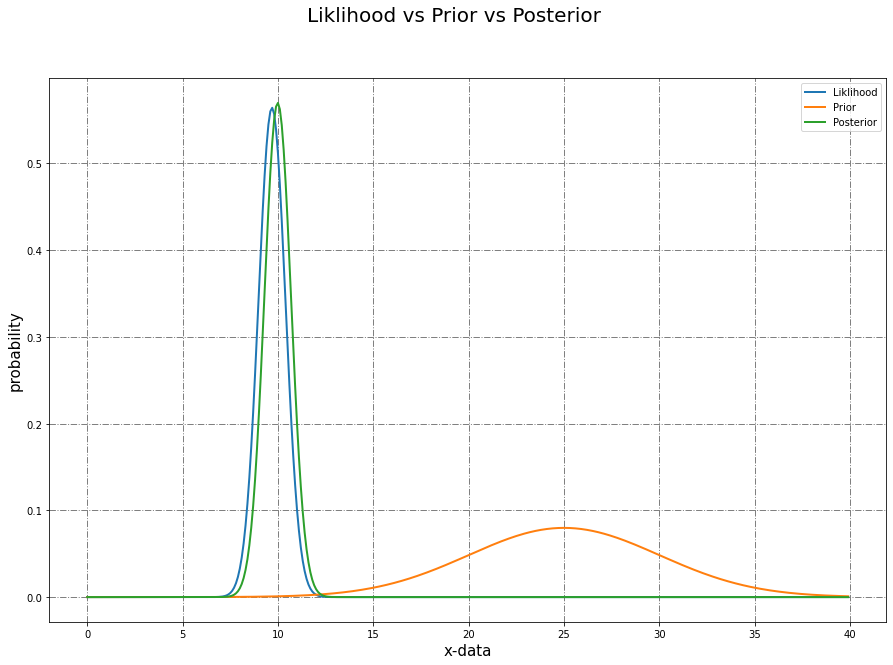

In [103]:
# Parameters to generate data
mu = 10
sigma = 5
num_data = 50

# Parameters of prior distribution
prior_mean = 25
prior_sigma = 5

# Plotting details
low_lim = 0
upp_lim = 40
del_x = 0.1

# Generate data
data = generate_data(mu, sigma, num_data)

# Deriving Empirical parameters from data
emp_mean, emp_variance = get_likelihood_param(data)

# Deriving Liklihood PDF
liklihood_mean = emp_mean
liklihood_sigma = sigma / np.sqrt(num_data)
x_liklihood_pdf, y_liklihood_pdf = get_gaussian(low_lim, upp_lim, del_x,  liklihood_mean, liklihood_sigma)

# Deriving Prior PDF
x_prior_pdf, y_prior_pdf = get_gaussian(low_lim, upp_lim, del_x,  prior_mean, prior_sigma)

# Deriving Posterior PDF
posterior_mean, posterior_sigma = get_posterior_param(data, sigma, prior_mean, prior_sigma)
x_posterior_pdf, y_posterior_pdf = get_gaussian(low_lim, upp_lim, del_x,  posterior_mean, posterior_sigma)

# Plotting Liklihood vs Prior vs Posterior
plot1 = plt.figure(1)
plot1.set_size_inches(15, 10)
plt.plot(x_liklihood_pdf, y_liklihood_pdf, label="Liklihood", linewidth=2.0)
plt.plot(x_prior_pdf, y_prior_pdf, label="Prior", linewidth=2.0)
plt.plot(x_posterior_pdf, y_posterior_pdf, label="Posterior", linewidth=2.0)

plt.xlabel('x-data', fontsize=15)
plt.ylabel('probability', fontsize=15)
plt.suptitle('Liklihood vs Prior vs Posterior', fontsize=20)
plt.grid(True, color = "grey", linewidth = "1", linestyle = "-.")
plt.legend(loc="upper right")

# (b)  Implement the Metropolis algorithm from the lecture slides to estimate the posterior distribution given the same prior and data and 

# show that it converges to the analytic posterior by plotting a histogram of samples from the distribution alongside the analytic posterior distribution.  Assume whatever SD (width) you want for the proposal distribution. 

In [104]:
def get_unnormal_gaussian4point(x, mu, sigma):
    ''' 
    This fn computes only the exponential part of gaussian distribution of each x data point. (scaling factor is neglected)
    
    input: x -> float, x for which gaussian exp has to be computed
           mu -> float, Mean of data generating gaussian
           sigma -> float, Variance of data generating gaussian
    output: y -> float, gaussian exp value for x
    '''
    # m_fac = 1/((np.sqrt(2*np.pi))*sigma)
    # y_normal = m_fac * np.exp(-0.5 * np.square((x - mu)/sigma))
    y = np.exp(-0.5 * np.square((x - mu)/sigma))
    return y

def get_likelihood_param(data):
    ''' 
    This fn computes empirical mean and empirical variance for a set of data points "data".

    input: data -> 1D np array of data points
    output: emp_mean -> float, average of all points in "data"
            emp_variance -> float, average of all points in "variance"
    '''
    no_data = len(data)
    emp_mean = np.sum(data)/no_data
    emp_variance = np.sum(np.square(data - emp_mean))/no_data
    return emp_mean, emp_variance

def get_unnormal_posterior(x, liklihood_mean, liklihood_sigma, prior_mean, prior_sigma):
    ''' 
    This fn computes the product of exp in liklihood and the exp in prior. this will furthur be used to compute
    numerator and denominator for gaussian.
    
    input: x -> float, x for which un normalised posterior has to be computed
           liklihood_mean -> float, Mean of likelihood gaussian
           liklihood_sigma -> float, variance of likelihood gaussian
           prior_mean -> float, Mean of prior gaussian
           prior_sigma -> float, variance of prior gaussian
    output: y_posterior_val -> float, unnormalised posterior value for x
    '''
    y_liklihood_val= get_unnormal_gaussian4point(x,  liklihood_mean, liklihood_sigma)
    y_prior_val= get_unnormal_gaussian4point(x,  prior_mean, prior_sigma)
    y_posterior_val = y_liklihood_val * y_prior_val
    return y_posterior_val

def get_mh_samples_posterior(no_samples, liklihood_mean, liklihood_sigma, prior_mean, prior_sigma, prop_sigma):
    ''' 
    This fn generates posterior samples based on Metropolis Hasting Algorithm. 
    The algorithm actually generates 10% more samples than just no_samples but selects only the later no_samples
    samples. This is to avoid erroneous samples generated initially due to wrong initialization.
    
    input: no_samples -> 2D feature data np array of size "no of data points" X "no of features"
           liklihood_mean -> float, Mean of likelihood gaussian
           liklihood_sigma -> float, variance of likelihood gaussian
           prior_mean -> float, Mean of prior gaussian
           prior_sigma -> float, variance of prior gaussian
           prop_sigma -> float, variance of proposal/jump density
    output: samples -> 1D np array of valid samplesrepresenting the posterior distribution
    '''
    samples = []
    s_prop_nm1 = np.random.normal(prior_mean, prior_sigma, 1)
    i = 0
    while i < (no_samples + np.floor(0.1*no_samples)):
        s_prop_n = np.random.normal(s_prop_nm1, prop_sigma, 1)
        num = get_unnormal_posterior(s_prop_n, liklihood_mean, liklihood_sigma, prior_mean, prior_sigma)
        den = get_unnormal_posterior(s_prop_nm1, liklihood_mean, liklihood_sigma, prior_mean, prior_sigma)
        r = num/den
        if r >= 1:
            samples.append(s_prop_n)
            s_prop_nm1 = s_prop_n
            i += 1
        else:
            a = np.random.uniform(0,1,1)
            if r > a:
                samples.append(s_prop_n)
                s_prop_nm1 = s_prop_n
                i += 1
            else:
                pass
    samples = samples[-no_samples:]
    samples = np.array(samples)
    return samples

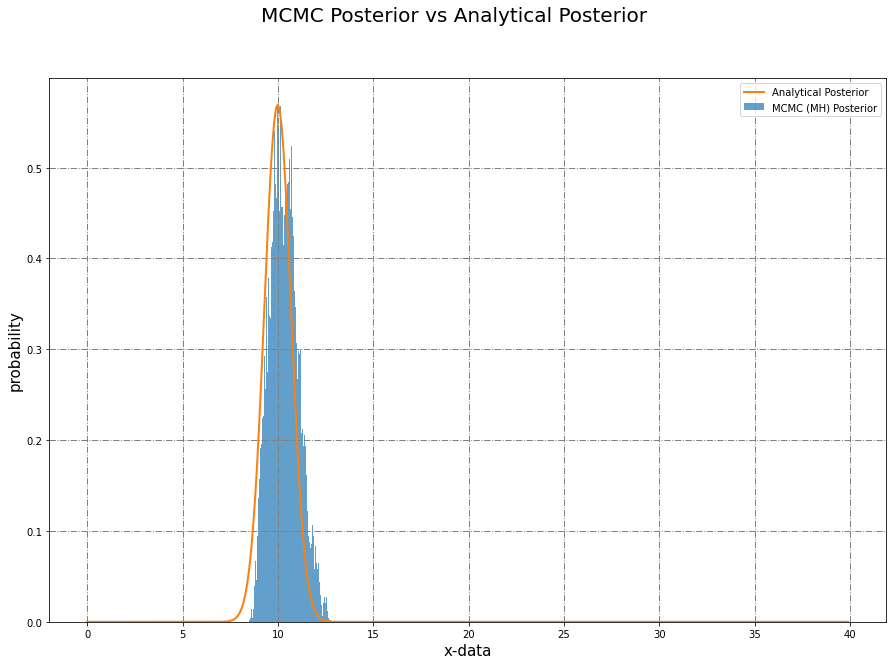

In [111]:
# Parameters to generate data
mu = 10
sigma = 5
num_data = 50

# Parameters of prior distribution
prior_mean = 25
prior_sigma = 5

# Proposal/Jump Density parameter
prop_sigma = 0.1

# Generate data
data = generate_data(mu, sigma, num_data)

# Deriving Empirical parameters from data
emp_mean, emp_variance = get_likelihood_param(data)

# Deriving Liklihood PDF parameters
liklihood_mean = emp_mean
liklihood_sigma = sigma / np.sqrt(num_data)

# Generating samples of posterior using Metropolis Hasting MCMC method
no_samples = 10000
samples = get_mh_samples_posterior(no_samples, liklihood_mean, liklihood_sigma, prior_mean, prior_sigma, prop_sigma)

# Plotting Histogram of MCMC Posterior and the Analytical Posterior on the same plot
plot1 = plt.figure(1)
plot1.set_size_inches(15, 10)

count, bins, ignored = plt.hist(samples,100, density = 1, alpha=0.7, label="MCMC (MH) Posterior")
plt.plot(x_posterior_pdf, y_posterior_pdf, label="Analytical Posterior", linewidth=2.0)
plt.xlabel('x-data', fontsize=15)
plt.ylabel('probability', fontsize=15)
plt.suptitle('MCMC Posterior vs Analytical Posterior', fontsize=20)
plt.grid(True, color = "grey", linewidth = "1", linestyle = "-.")
plt.legend(loc="upper right")
plt.show()

# Q2 c) How does the speed of convergence of the sampling depend on the proposal width? Is there an optimal proposal width that would work best? Demonstrate the consequences of using sub-optimal proposal width and terminating sampling too soon.

<font size="4">
    
The effect of SD (width) of proposal/jump distribution over speed of convergence:

    1. A proposal density with large SD will quite often generate outlier samples (outlier w.r.t the  posterior distribution)
    This will lead to too many rejections. Thus the time taken to converge will be very high.
    
    2. On the other hand, The proposal density with small SD will move slowly towards the target posterior density. 
    Now since the samples will be accepted more often the time taken to accumulate "N" samples will be faster with lower SD. But it is recommended to neglect initial samples as they might not resemble to the actual target distribution.


Optimal SD for proposal density:

1. In the number of data points are high it would appropriate to consider a SD inspired by the likelihood. For example considering $proposal SD = \frac{\sigma}{n} = \frac{5}{50} = 0.1 $ as suggested by equation (3) in Liklihood derivation

    
2. If the number of data points are low it would appropriate to consider a SD inspired by the prior
    
Next to next cell will demostrate the consequence of using a suboptmial proposal width and terminating the sampling too soon. 
</font>

Text(0, 0.5, 'Time taken')

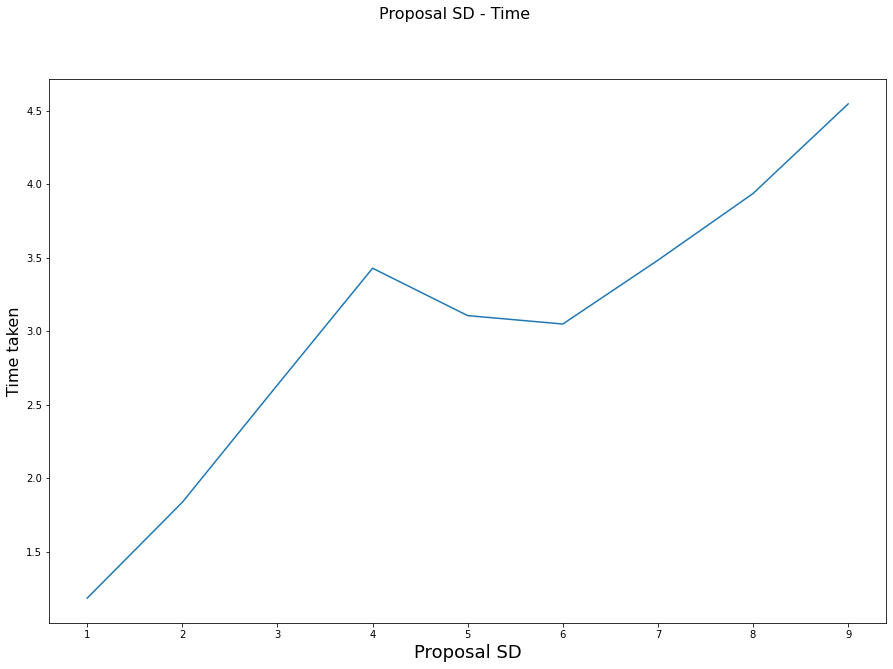

In [76]:
import time # to just demonstrate the time
# Parameters to generate data
mu = 10
sigma = 5
num_data = 50

# Parameters of prior distribution
prior_mean = 25
prior_sigma = 3

# Proposal/Jump Density parameter
#prop_sigma = 2

# Generate data
data = generate_data(mu, sigma, num_data)

# Deriving Empirical parameters from data
emp_mean, emp_variance = get_likelihood_param(data)

# Deriving Liklihood PDF parameters
liklihood_mean = emp_mean
liklihood_sigma = sigma / np.sqrt(num_data)

# Generating samples of posterior using Metropolis Hasting MCMC method
time_list = []
prop_sigma_list = []
for prop_sigma in range(1,10):
    
    t_begin = time.time()
    no_samples = 10000
    samples = get_mh_samples_posterior(no_samples, liklihood_mean, liklihood_sigma, prior_mean, prior_sigma, prop_sigma)
    t_end = time.time()
    
    time_list.append(t_end - t_begin)
    prop_sigma_list.append(prop_sigma)
    
fig = plt.figure()
fig.set_size_inches(15, 10)
plt.plot(prop_sigma_list, time_list)
fig.suptitle('Proposal SD - Time', fontsize=16)
plt.xlabel('Proposal SD', fontsize=18)
plt.ylabel('Time taken', fontsize=16)


# Demonstartion of Consequence of using a suboptmial proposal width and terminating the sampling too soon:
<font size="4">
The consequences of using sub-optimal proposal width and terminating sampling too soon:

    - When we choose a proposal SD which is very small,  although many of the initial samples will be accepted for the low SD case, the samples will move very slowly towards the actual target distribution. Thus appropriate samples (closer to posterior) will take large time. It is thus recommended to neglect many of the initial samples so that later we find samples closer to actual posterior distribution. Hence terminating sampling too soon will give a bad set of samples.
    
    - It is also required to initialize sampling from a relatively logical value than a wild guess. A initial value very far from actual will again take longer time to coincide to actual distribution.
</font>

--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*

******************************************** SMALL PROPOSAL SD ***********************************************
--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*

For a proposal density with SD = 0.01 and generating 10000 samples. Time taken is =  0.48055291175842285
--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*

--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*



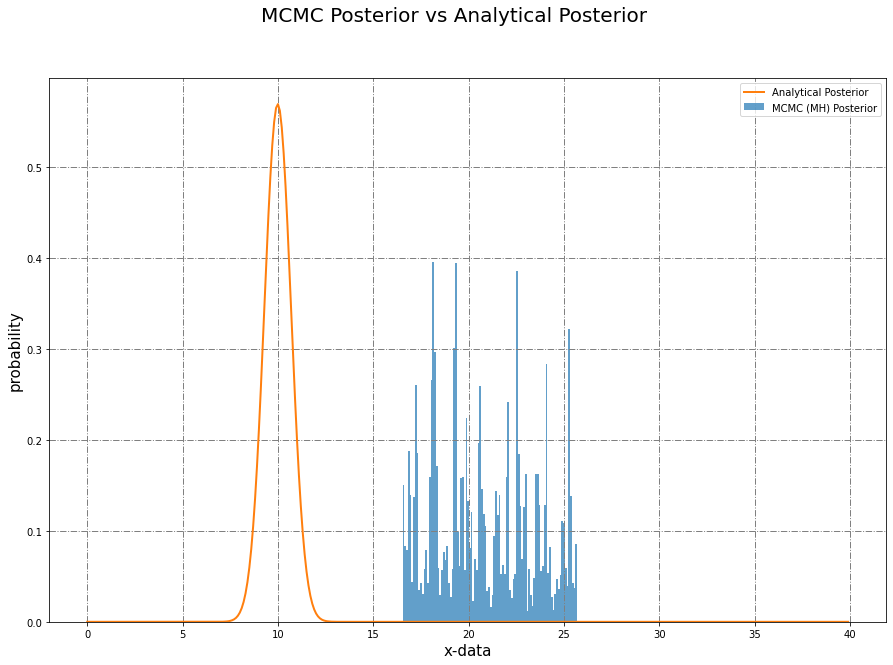

In [116]:
import time # just to demonstrate time 
def get_mh_samples_posterior_demo(no_samples, liklihood_mean, liklihood_sigma, prior_mean, prior_sigma, prop_sigma):
    ''' 
    This fn generates posterior samples based on Metropolis Hasting Algorithm. 
    
    ####### This algo. do not neglect initial samples for domnstration purpose ########
    
    input: no_samples -> 2D feature data np array of size "no of data points" X "no of features"
           liklihood_mean -> float, Mean of likelihood gaussian
           liklihood_sigma -> float, variance of likelihood gaussian
           prior_mean -> float, Mean of prior gaussian
           prior_sigma -> float, variance of prior gaussian
           prop_sigma -> float, variance of proposal/jump density
    output: samples -> 1D np array of valid samplesrepresenting the posterior distribution
    '''
    samples = []
    s_prop_nm1 = np.random.normal(prior_mean, prior_sigma, 1)
    i = 0
    while i < (no_samples + np.floor(0.1*no_samples)):
        s_prop_n = np.random.normal(s_prop_nm1, prop_sigma, 1)
        num = get_unnormal_posterior(s_prop_n, liklihood_mean, liklihood_sigma, prior_mean, prior_sigma)
        den = get_unnormal_posterior(s_prop_nm1, liklihood_mean, liklihood_sigma, prior_mean, prior_sigma)
        r = num/den
        if r >= 1:
            samples.append(s_prop_n)
            s_prop_nm1 = s_prop_n
            i += 1
        else:
            a = np.random.uniform(0,1,1)
            if r > a:
                samples.append(s_prop_n)
                s_prop_nm1 = s_prop_n
                i += 1
            else:
                pass
    #samples = samples[-no_samples:]
    samples = np.array(samples)
    return samples

# Parameters to generate data
mu = 10
sigma = 5
num_data = 50

# Parameters of prior distribution
prior_mean = 25
prior_sigma = 5

# Proposal/Jump Density parameter
prop_sigma = 0.01

# Generate data
data = generate_data(mu, sigma, num_data)

# Deriving Empirical parameters from data
emp_mean, emp_variance = get_likelihood_param(data)

# Deriving Liklihood PDF parameters
liklihood_mean = emp_mean
liklihood_sigma = sigma / np.sqrt(num_data)

# Generating samples of posterior using Metropolis Hasting MCMC method
no_samples = 10000
t_begin1 = time.time()
samples = get_mh_samples_posterior_demo(no_samples, liklihood_mean, liklihood_sigma, prior_mean, prior_sigma, prop_sigma)
t_end1 = time.time()
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")
print("******************************************** SMALL PROPOSAL SD ***********************************************")
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")
print("For a proposal density with SD =", prop_sigma, "and generating", no_samples, "samples. Time taken is = ", (t_end1 - t_begin1))
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")

# Plotting Histogram of MCMC Posterior and the Analytical Posterior on the same plot
plot1 = plt.figure(1)
plot1.set_size_inches(15, 10)

count, bins, ignored = plt.hist(samples,100, density = 1, alpha=0.7, label="MCMC (MH) Posterior")
plt.plot(x_posterior_pdf, y_posterior_pdf, label="Analytical Posterior", linewidth=2.0)
plt.xlabel('x-data', fontsize=15)
plt.ylabel('probability', fontsize=15)
plt.suptitle('MCMC Posterior vs Analytical Posterior', fontsize=20)
plt.grid(True, color = "grey", linewidth = "1", linestyle = "-.")
plt.legend(loc="upper right")
plt.show()

--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*

******************************************** LARGE PROPOSAL SD ***********************************************
--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*

For a proposal density with SD = 15 and generating 10000 samples. Time taken is =  7.436771869659424
--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*

--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*



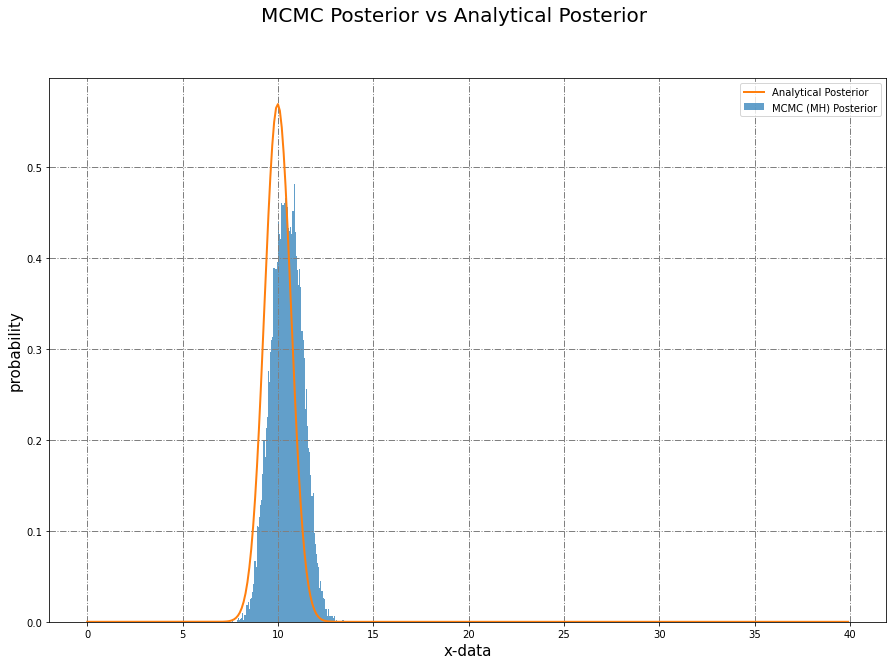


LARGE SD case took 7.436771869659424 and small SD case took 0.48055291175842285 
 

But the small SD did not converge to correct posterior distribution since the sampling was terminated too soon



In [125]:
import time # just to demonstrate time 
def get_mh_samples_posterior_demo(no_samples, liklihood_mean, liklihood_sigma, prior_mean, prior_sigma, prop_sigma):
    ''' 
    This fn generates posterior samples based on Metropolis Hasting Algorithm. 
    
    ####### This algo. do not neglect initial samples for domnstration purpose ########
    
    input: no_samples -> 2D feature data np array of size "no of data points" X "no of features"
           liklihood_mean -> float, Mean of likelihood gaussian
           liklihood_sigma -> float, variance of likelihood gaussian
           prior_mean -> float, Mean of prior gaussian
           prior_sigma -> float, variance of prior gaussian
           prop_sigma -> float, variance of proposal/jump density
    output: samples -> 1D np array of valid samplesrepresenting the posterior distribution
    '''
    samples = []
    s_prop_nm1 = np.random.normal(prior_mean, prior_sigma, 1)
    i = 0
    while i < (no_samples + np.floor(0.1*no_samples)):
        s_prop_n = np.random.normal(s_prop_nm1, prop_sigma, 1)
        num = get_unnormal_posterior(s_prop_n, liklihood_mean, liklihood_sigma, prior_mean, prior_sigma)
        den = get_unnormal_posterior(s_prop_nm1, liklihood_mean, liklihood_sigma, prior_mean, prior_sigma)
        r = num/den
        if r >= 1:
            samples.append(s_prop_n)
            s_prop_nm1 = s_prop_n
            i += 1
        else:
            a = np.random.uniform(0,1,1)
            if r > a:
                samples.append(s_prop_n)
                s_prop_nm1 = s_prop_n
                i += 1
            else:
                pass
    #samples = samples[-no_samples:]
    samples = np.array(samples)
    return samples

# Parameters to generate data
mu = 10
sigma = 5
num_data = 50

# Parameters of prior distribution
prior_mean = 25
prior_sigma = 5

# Proposal/Jump Density parameter
prop_sigma = 15

# Generate data
data = generate_data(mu, sigma, num_data)

# Deriving Empirical parameters from data
emp_mean, emp_variance = get_likelihood_param(data)

# Deriving Liklihood PDF parameters
liklihood_mean = emp_mean
liklihood_sigma = sigma / np.sqrt(num_data)

# Generating samples of posterior using Metropolis Hasting MCMC method
no_samples = 10000
t_begin2 = time.time()
samples = get_mh_samples_posterior_demo(no_samples, liklihood_mean, liklihood_sigma, prior_mean, prior_sigma, prop_sigma)
t_end2 = time.time()
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")
print("******************************************** LARGE PROPOSAL SD ***********************************************")
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")
print("For a proposal density with SD =", prop_sigma, "and generating", no_samples, "samples. Time taken is = ", (t_end2 - t_begin2))
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")
print("--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*--------*\n")

# Plotting Histogram of MCMC Posterior and the Analytical Posterior on the same plot
plot1 = plt.figure(1)
plot1.set_size_inches(15, 10)

count, bins, ignored = plt.hist(samples,100, density = 1, alpha=0.7, label="MCMC (MH) Posterior")
plt.plot(x_posterior_pdf, y_posterior_pdf, label="Analytical Posterior", linewidth=2.0)
plt.xlabel('x-data', fontsize=15)
plt.ylabel('probability', fontsize=15)
plt.suptitle('MCMC Posterior vs Analytical Posterior', fontsize=20)
plt.grid(True, color = "grey", linewidth = "1", linestyle = "-.")
plt.legend(loc="upper right")
plt.show()

print("\033[1m")
print("LARGE SD case took", (t_end2 - t_begin2), "and small SD case took", (t_end1 - t_begin1), "\n \n")
print("But the small SD did not converge to correct posterior distribution since the sampling was terminated too soon")
print("\033[0;0m")

# Note the excessive large amount of time taken in Large SD case